In [101]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import scipy.stats as si
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

path = os.getcwd()
path = 'C:/Users/USER-PC/Documents/GitHub/homework/FE539'
S = 1500
rf = 0.0265
yields = pd.read_csv(path + '/yields.csv')
data = pd.read_csv(path + '/data.csv')
data = pd.read_csv(path + '/data.csv')
data = data[data['days'] < 501]
data = data[data['days'] > 10]
d1 = data[(data['type'] == 'C') & (data['strike'] < S)]
data = d1.append(data[(data['type'] == 'P') & (data['strike'] > S)])
data = data[data['strike'] > 1000]
data = data[data['strike'] < 2000]
callput = data['type'].values
T = (data['days']).values
K = (data['strike']).values
V = data['IV'].values
P = data['price'].values
len(data)

1329

[[ 0.1326881   0.13253752  0.15399996 ...  0.07700719  0.12767953
   0.2219904 ]
 [-0.03108426  0.07413742  0.23916199 ... -0.0355548   0.27494889
   0.09967716]
 [ 0.17721065  0.22314668  0.26235853 ...  0.1388644   0.32878389
   0.31111345]
 ...
 [-0.12761865 -0.02567612  0.33445698 ... -0.13293745  0.39391377
   0.07219512]
 [ 0.15258976  0.18467815  0.15530058 ...  0.12536975  0.15015339
   0.23982361]
 [-0.02534251  0.0765809   0.23825906 ... -0.03101607  0.27262126
   0.10165452]]


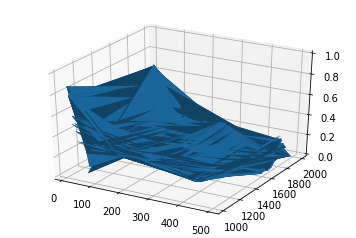

<Figure size 432x288 with 0 Axes>

In [83]:
from scipy.interpolate import Rbf
import numpy as np



t = np.array(T)
k = np.array(K)
v = np.array(V)
rbfi = Rbf(t, k, v, function = 'thin_plate')  # radial basis function interpolator instance
print(rbfi)
t_pred = np.random.rand(100)*500
k_pred = np.random.rand(100)*1000 + 1000
Tx, Yx = np.meshgrid(t_pred, k_pred)
zs = np.array([rbfi(t1, k1) for t1, k1 in zip(np.ravel(Tx), np.ravel(Yx))])
Z = zs.reshape(Tx.shape)
print(Z)
di = rbfi(t_pred, k_pred)
fig = plt.figure() 
ax = fig.gca(projection='3d')
#d = pd.DataFrame({'a':Tx})
#ax.scatter(t, k, v, label='true')
#ax.scatter(t_pred, k_pred, di, label = 'rbf')
ax.plot_surface(Tx, Yx, Z)
ax.set_zlim(0, 1)
plt.show()
plt.clf()


#Ta = np.array(T)
#Ka = np.array(K)
#Va = np.array(V)
#print(Ta, Ka, Va)
#rbfi = Rbf(Ta, Ka, np.zeros(len(Ta)), Va)


In [84]:
def rbf(x, c, s):
    #return np.exp(-1 / (2 * s**2) * (x-c)**2)
    #return (((x-c))**2)*np.log(x-c)
    #eturn (np.linalg.norm(x-c)**2)*np.log(np.linalg.norm(x-c))
    d =  (math.hypot(x[0]-c[0], x[1] - c[1])**2)
    return (d**2)*np.log(d)
    #return np.exp(-1/(2*s**2)*np.linalg.norm(x-c)**2)

In [162]:
def kmeans(X, k):
    """Performs k-means clustering for 1D input
    
    Arguments:
        X {ndarray} -- A Mx1 array of inputs
        k {int} -- Number of clusters
    
    Returns:
        ndarray -- A kx1 array of final cluster centers
    """

    # randomly select initial clusters from input data
    idx = np.random.randint(len(X), size=k)
    clusters = X[idx,:]
    prevClusters = clusters.copy()
    stds = np.zeros(k)
    converged = False
    
    while not converged:
        """
        compute distances for each cluster center to each point 
        where (distances[i, j] represents the distance between the ith point and jth cluster)
        """
        distances = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :]))

        # find the cluster that's closest to each point
        closestCluster = np.argmin(distances, axis=1)

        # update clusters by taking the mean of all of the points assigned to that cluster
        for i in range(k):
            pointsForCluster = X[closestCluster == i]
            if len(pointsForCluster) > 0:
                clusters[i] = np.mean(pointsForCluster, axis=0)

        # converge if clusters haven't moved
        converged = np.linalg.norm(clusters - prevClusters) < 1e-6
        prevClusters = clusters.copy()

    distances = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :]))
    closestCluster = np.argmin(distances, axis=1)

    clustersWithNoPoints = []
    for i in range(k):
        pointsForCluster = X[closestCluster == i]
        if len(pointsForCluster) < 2:
            # keep track of clusters with no points or 1 point
            clustersWithNoPoints.append(i)
            continue
        else:
            stds[i] = np.std(X[closestCluster == i])

    # if there are clusters with 0 or 1 points, take the mean std of the other clusters
    if len(clustersWithNoPoints) > 0:
        pointsToAverage = []
        for i in range(k):
            if i not in clustersWithNoPoints:
                pointsToAverage.append(X[closestCluster == i])
        pointsToAverage = np.concatenate(pointsToAverage).ravel()
        stds[clustersWithNoPoints] = np.mean(np.std(pointsToAverage))
    print(clusters)
    return clusters, stds

kmeans(X, k = 5)

[[  21.19636924   21.19636924   21.19636924]
 [ 220.21126761  220.21126761  220.21126761]
 [1333.32       1333.32       1333.32      ]
 [ 656.60540676  656.60540676  656.60540676]
 [ 482.6031746   482.6031746   482.6031746 ]]


(array([[  21.19636924,   21.19636924,   21.19636924],
        [ 220.21126761,  220.21126761,  220.21126761],
        [1333.32      , 1333.32      , 1333.32      ],
        [ 656.60540676,  656.60540676,  656.60540676],
        [ 482.6031746 ,  482.6031746 ,  482.6031746 ]]),
 array([ 32.07124927,  61.55670286, 188.53083992, 617.40107107,
         13.19757034]))

c:\users\user-pc\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
c:\users\user-pc\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:26: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.


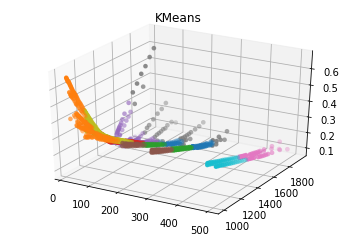

c:\users\user-pc\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:39: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.


<Figure size 432x288 with 0 Axes>

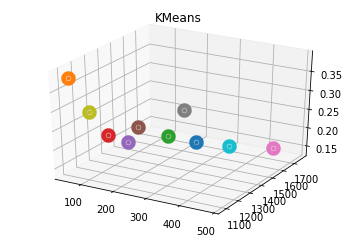

In [163]:
Ta = np.array(T)
Ka = np.array(K)
Va = np.array(V)

idx = np.random.randint(len(T), size=1000)
K1 = Ka[idx]
T1 = Ta[idx]
V1 = Va[idx]
X = np.array([T1, K1, V1]).T
Xt = np.array([Ta, Ka, Va]).T
n_clusters = 10
k_means = KMeans(n_clusters = n_clusters
                ).fit(Xt)

k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_
k_means_labels_unique = np.unique(k_means_labels)

##############################################################################
# Plot result

colors = ['#4EACC5', '#FF9C34', '#4E9A06']
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.hold(True)
ax1.hold(True)
for k in (range(n_clusters)):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.scatter(Xt[my_members, 0], Xt[my_members, 1],Xt[my_members, 2], linewidths = 0.1)
    ax1.scatter(cluster_center[0], cluster_center[1], cluster_center[2], linewidths = 10)
plt.title('KMeans')
plt.grid(True)
plt.show()
plt.clf()

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.hold(True)
for k in (range(n_clusters)):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    #ax.scatter(Xt[my_members, 0], Xt[my_members, 1],Xt[my_members, 2], linewidths = 0.1)
    ax.scatter(cluster_center[0], cluster_center[1], cluster_center[2], linewidths = 10)
plt.title('KMeans')
plt.grid(True)
plt.show()


In [179]:
class RBFNet(object):
    """Implementation of a Radial Basis Function Network"""
    def __init__(self, k=2, lr=0.01, epochs=100, rbf=rbf, inferStds=True):
        self.k = k
        self.lr = lr
        self.epochs = epochs
        self.rbf = rbf
        self.inferStds = inferStds

        self.w = np.array([np.random.randn(k), np.random.randn(k)]).T
        self.b = np.random.randn(1)
    def fit(self, X, y):
        if self.inferStds:
            # compute stds from data
            self.centers, self.stds = kmeans(X, self.k)
        else:
            # use a fixed std 
            k_means = KMeans(n_clusters = k).fit(X)
            self.centers = k_means.cluster_centers_
            dMax = max([np.abs(c1 - c2) for c1 in self.centers for c2 in self.centers])
            self.stds = np.repeat(dMax / np.sqrt(2*self.k), self.k)
            
        # training
        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                # forward pass
                a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.stds)])
                if (epoch == 0) & (i==0):
                    print(self.centers)
                F = a.T.dot(self.w) + self.b
                loss = (y[i] - F).flatten() ** 2
                # backward pass
                error = np.sum(-(y[i] - F).flatten())
                #if epoch == 0 & i == 0:
                # online up date
                self.w = self.w - np.repeat(self.lr * a * error, 2).reshape(self.k, 2)
                self.b = self.b - self.lr * error
    def predict(self, X):
        y_pred = []
        for i in range(X.shape[0]):
            a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.stds)])
            F = a.T.dot(self.w) + self.b
            y_pred.append(np.sum(F))
        return np.array(y_pred)


[[  55   55]
 [ 240  240]
 [1401 1401]
 [1615 1615]
 [ 588  588]
 [ 374  374]
 [ 477  477]
 [ 579  579]
 [1229 1229]
 [1080 1080]]
[[  55   55]
 [ 240  240]
 [1401 1401]
 [1615 1615]
 [ 588  588]
 [ 374  374]
 [ 477  477]
 [ 579  579]
 [1229 1229]
 [1080 1080]]


c:\users\user-pc\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in square
c:\users\user-pc\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in subtract
c:\users\user-pc\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in subtract


[nan nan nan nan nan nan nan nan nan nan]


c:\users\user-pc\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


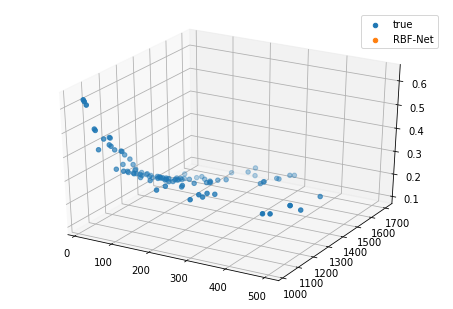

In [180]:
Ta = np.array(T)
Ka = np.array(K)
Va = np.array(V)

idx = np.random.randint(len(T), size=100)
K1 = Ka[idx]
T1 = Ta[idx]
V1 = Va[idx]
X = np.array([T1, K1]).T
y = V1
rbfnet = RBFNet(lr = 0.1, k=10)
rbfnet.fit(X, y)

t_pred = np.random.rand(10)*500
k_pred = np.random.rand(10)*1000 + 1000
x_pred = np.array([t_pred, k_pred]).T

y_pred = rbfnet.predict(x_pred)

fig = plt.figure()
ax = Axes3D(fig)
print(y_pred)
ax.scatter(T1, K1, y, label='true')
ax.scatter(t_pred, k_pred, y_pred, label='RBF-Net')
plt.legend()

plt.tight_layout()
plt.show()

In [75]:
x_pred = np.array([np.random.rand(1000)*500, np.random.rand()*1000 + 1000])
t_pred = np.random.rand(1000)*500
k_pred = np.random.rand(1000)*1000 + 1000
x_pred = np.array([t_pred, k_pred]).T
arr = np.array([1, 2])
arr[1]

2